<a id='toc'></a>

# Table of Contents

<ul>
    <li><a href='#section_0'>Section 0: Introduction</a></li>
    <li><a href='#section_1'>Section 1: Data Loading</a></li>
    <li><a href='#section_2'>Section 2: Data Preprocessing</a></li>
    <li><a href='#section_3'>Section 3: Exploratory Data Analysis</a></li>
    <li><a href='#section_4'>Section 4: Statistical Data Analysis</a></li>
    <li><a href='#section_5'>Section 5: Conclusion</a></li>
</ul>

<a id='section_0'></a>

# Section 0: Introduction
<a href='#section_1'>[Skip to Data Loading]</a>

The fictitious company Megaline is paying us an exorbitant fee to answer one question:

    Which of their two prepaid plans generates the most revenue?
    
They intend to use this knowledge to improve advertising resource allocations.

We are provided with a sample of their clientele's data and from it we must parse out behavioral patterns in order to determine the better revenue generator among the two plans.

<a id='section_1'></a>

# Section 1: Data Loading
<a href='#section_2'>[Skip to Data Preprocessing]</a>

In [1]:
import pandas as pd
import sys
import warnings

if not sys.warnoptions:
       warnings.simplefilter("ignore")

try:
    calls_data = pd.read_csv('datasets/megaline_calls.csv')
    internet_data = pd.read_csv('datasets/megaline_internet.csv')
    messages_data = pd.read_csv('datasets/megaline_messages.csv')
    plans_data = pd.read_csv('datasets/megaline_plans.csv')
    users_data = pd.read_csv('datasets/megaline_users.csv')
except:
    calls_data = pd.read_csv('/datasets/megaline_calls.csv')
    internet_data = pd.read_csv('/datasets/megaline_internet.csv')
    messages_data = pd.read_csv('/datasets/megaline_messages.csv')
    plans_data = pd.read_csv('/datasets/megaline_plans.csv')
    users_data = pd.read_csv('/datasets/megaline_users.csv')

In [2]:
# First ten entries
print("CALLS:")
display(calls_data.head(5))
display(calls_data.describe())
print("\nINTERNET:")
display(internet_data.head(5))
display(internet_data.describe())
print("\nMESSAGES:")
display(messages_data.head(5))
display(messages_data.describe())
print("\nPLANS:")
display(plans_data.head(5))
display(plans_data.describe())
print("\nUSERS:")
display(users_data.head(5))
display(users_data.describe())

CALLS:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000



INTERNET:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000



MESSAGES:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000



PLANS:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000



USERS:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


### Notes

All columns seem to be appropriately named and of the appropriate type.

There don't appear to be any obvious problems with the data other than the zero entries for call duration and internet usage.
    - These could have been erroneously input/generated when collected
    - They could also represent missed calls or failed connections

<a id='section_2'></a>

# Section 2: Data Preprocessing
<a href='#section_3'>[Skip to Exploratory Data Analysis]</a>

In [3]:
# Search for missing values
print(calls_data.isna().sum())
print(internet_data.isna().sum())
print(messages_data.isna().sum())
print(plans_data.isna().sum())
print(users_data.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
id              0
user_id         0
message_date    0
dtype: int64
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [4]:
# Search for duplicate values
print(calls_data.duplicated().sum())
print(internet_data.duplicated().sum())
print(messages_data.duplicated().sum())
print(plans_data.duplicated().sum())
print(users_data.duplicated().sum())

0
0
0
0
0


### Notes

- Somewhat unexpectedly, the only overtly missing information is something that should be missing: the termination of service date (churn_date)
- When we dig deeper to check for duplicates, we again come up empty-handed

In [5]:
# Search for type errors
print("CALLS:")
print(calls_data.info())
print("\nINTERNET:")
print(internet_data.info())
print("\nMESSAGES:")
print(messages_data.info())
print("\nPLANS:")
print(plans_data.info())
print("\nUSERS:")
print(users_data.info())

CALLS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

INTERNET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

MESSAGES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):

### Notes

- Further all types seem to fit their respective categories

### General Observations

- The data seems too 'clean' already. Highly suspicious, if you ask me!

### Anomalies

In [6]:
print("Number of Calls by Month:")
print(pd.DatetimeIndex(calls_data['call_date']).month.value_counts())
print("\nNumber of Internet Sessions by Month:")
print(pd.DatetimeIndex(internet_data['session_date']).month.value_counts())
print("\nNumber of Messages by Month:")
print(pd.DatetimeIndex(messages_data['message_date']).month.value_counts())
print("\nNumber of Registrations by Month:")
print(pd.DatetimeIndex(users_data['reg_date']).month.value_counts())

Number of Calls by Month:
12    30614
11    24651
10    21064
9     16523
8     13590
7     11105
6      8221
5      5959
4      3442
3      1620
2       774
1       172
Name: call_date, dtype: int64

Number of Internet Sessions by Month:
12    23492
11    18651
10    16193
9     12722
8     10718
7      8110
6      6057
5      4288
4      2558
3      1336
2       604
1        96
Name: session_date, dtype: int64

Number of Messages by Month:
12    19071
11    14068
10    12201
9      9227
8      7394
7      5208
6      3833
5      2780
4      1333
3       594
2       259
1        83
Name: message_date, dtype: int64

Number of Registrations by Month:
6     54
1     49
8     47
4     45
2     42
10    42
3     40
5     38
11    38
12    37
7     36
9     32
Name: reg_date, dtype: int64


In [7]:
# Identify new users who have no data
brand_new_users = []
for user_id in range(users_data['user_id'].min(), users_data['user_id'].max()+1):
    user_calls = calls_data.loc[calls_data['user_id'] == user_id]
    

In [8]:
n_subsecond_calls = len(calls_data.loc[calls_data['duration'] < 0.01])
n_calls = len(calls_data)

n_submb_sessions = len(internet_data.loc[internet_data['mb_used'] < 0.01])
n_sessions = len(internet_data)

print("Number of subsecond calls:")
print(n_subsecond_calls)
print("Number of calls:")
print(n_calls)
print("Ratio of subsecond calls to total calls:")
print(n_subsecond_calls / n_calls)

print("\nNumber of submb session:")
print(n_submb_sessions)
print("Number of sessions:")
print(n_sessions)
print("Ratio of submb sessions to total sessions:")
print(n_submb_sessions / n_sessions)

n_new_users = 0

for user_id in range(users_data['user_id'].min(), users_data['user_id'].max()+1):
    user_calls = calls_data.loc[calls_data['user_id'] == user_id]
    n_subsecond_user_calls = len(user_calls.loc[user_calls['duration'] < 0.01])
    n_user_calls = len(user_calls)
    if (n_user_calls <= 0):
        n_new_users += 1
        
print("\nNEW USERS")
print(n_new_users)

Number of subsecond calls:
26834
Number of calls:
137735
Ratio of subsecond calls to total calls:
0.1948233927469416

Number of submb session:
13747
Number of sessions:
104825
Ratio of submb sessions to total sessions:
0.1311423801574052

NEW USERS
19


- The data appears to track several months of data for some users (August, November, & December are all represented in the first 10 columns of some datasets).
    - Odd because there is only one plan listed per user
        - At least some users would likely have upgraded to Ultimate from Surf, or they would downgraded from Ultimate to Surf
- The transaction id for calls, internet, & messages have an inscrutable numbering system that is out of sync with the datetime it ostensibly occurred.
    - If there is a rhyme or reason to this scheme, then it indicates a severe disconnect in the data
- The calls_data and internet_data also seems to contain many 0.00 values
    - Are these sub-second calls/submb sessions? Do they still count toward the bill? Or should they be omitted?
    - They account for ~20% of the calls_data and ~13% of the internet data, meaning they form a non-negligible portion of the data
        - As such, we will include the data (rounding it up to the minute), but they will not affect the internet usage
- There are also a small number of new users who we will not consider for questions regarding usage, such as number of calls, texts, etc., but can still reference when investigating considering questions of signups and retention.

### Adding Other Columns for EDA

In [9]:
# utils
import numpy as np
SURF_USER = 0
ULTIMATE_USER = 1
GB_TO_MB = 1_024

month_mapper = {0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10,10:11,11:12}

def ceiling_calls(num):
    if num == 0:
        return 1
    clipped_num = int(num)
    if clipped_num == num:
        return num
    else:
        return clipped_num + 1

def ceiling_internet(num):
    num /= GB_TO_MB # convert to GB
    return np.ceil(num) * GB_TO_MB # convert back to MB

def get_month(date):
    assert type(date) is str
    return int(date[5:7])

def get_revenue(call_mins, messages_num, internet_mb, plan):
    revenue = 0
    # assumes new user or no longer a user
    if call_mins == 0 and messages_num == 0 and internet_mb == 0:
        return revenue
    assert(plan == "ultimate" or plan == "surf")
    if plan == "ultimate":
        revenue = plans_data["usd_monthly_pay"][ULTIMATE_USER]
        extra_mins = call_mins - plans_data["minutes_included"][ULTIMATE_USER]
        extra_messages = messages_num - plans_data["messages_included"][ULTIMATE_USER]
        extra_gb = (internet_mb - plans_data["mb_per_month_included"][ULTIMATE_USER]) / GB_TO_MB
        if extra_mins > 0:
            revenue += extra_mins
        if extra_messages > 0:
            revenue += extra_messages
        if extra_gb > 0:
            revenue += extra_gb * plans_data["usd_per_gb"][ULTIMATE_USER]
    else:
        revenue = plans_data["usd_monthly_pay"][SURF_USER]
        extra_mins = call_mins - plans_data["minutes_included"][SURF_USER]
        extra_messages = messages_num - plans_data["messages_included"][SURF_USER]
        extra_gb = (internet_mb - plans_data["mb_per_month_included"][SURF_USER]) / GB_TO_MB
        if extra_mins > 0:
            revenue += extra_mins * plans_data["usd_per_minute"][SURF_USER]
        if extra_messages > 0:
            revenue += extra_messages * plans_data["usd_per_message"][SURF_USER]
        if extra_gb > 0:
            revenue += extra_gb * plans_data["usd_per_gb"][SURF_USER]
    return revenue

### Notes
- get_revenue() method assumes that no data for calls, texts, or internet means this is a new user or a user who no longer uses the service and thus counts revenue for that month as 0
    - One other possibility exists: the user continued to pay, but didn't use any of their calls, texts, or internet for a given month (maybe they went on a no cellphone meditation retreat for a month?)

In [10]:
# Num calls made & minutes used per user per month
# create dictionary of users' monthly usage
calls_data_by_month_num_calls = {}
calls_data_by_month_duration = {}
for user_id in range(1000, 1500):
    calls_data_by_month_num_calls[user_id] = [0,0,0,0,0,0,0,0,0,0,0,0]
    calls_data_by_month_duration[user_id] = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(calls_data)):
    user_id = calls_data.loc[i, "user_id"]
    month = get_month(calls_data.loc[i, "call_date"])
    len_call = ceiling_calls(calls_data.loc[i, "duration"]) # round up
    calls_data_by_month_num_calls[user_id][month-1] = calls_data_by_month_num_calls[user_id][month-1]+1
    calls_data_by_month_duration[user_id][month-1] = calls_data_by_month_duration[user_id][month-1]+len_call
    
calls_data_by_month_num_calls = pd.DataFrame.from_dict(calls_data_by_month_num_calls, orient="index")
calls_data_by_month_duration = pd.DataFrame.from_dict(calls_data_by_month_duration, orient="index")

calls_data_by_month_num_calls = calls_data_by_month_num_calls.rename(columns=month_mapper)
calls_data_by_month_duration = calls_data_by_month_duration.rename(columns=month_mapper)

print("NUMBER OF CALLS PER MONTH BY USER")
display(calls_data_by_month_num_calls)
print("\nDURATION OF CALLS PER MONTH BY USER")
display(calls_data_by_month_duration)

NUMBER OF CALLS PER MONTH BY USER


,1,2,3,4,5,6,7,8,9,10,11,12
1000,0,0,0,0,0,0,0,0,0,0,0,16
1001,0,0,0,0,0,0,0,27,49,65,64,56
1002,0,0,0,0,0,0,0,0,0,11,55,47
1003,0,0,0,0,0,0,0,0,0,0,0,149
1004,0,0,0,0,21,44,49,49,42,61,54,50
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,52,75,61,65
1496,0,0,0,0,0,0,0,18,52,46,39,40
1497,0,0,0,0,0,0,0,0,0,0,0,54
1498,0,37,37,47,35,37,43,44,45,46,41,39



DURATION OF CALLS PER MONTH BY USER


,1,2,3,4,5,6,7,8,9,10,11,12
1000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0
1001,0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,326.0,411.0,441.0,422.0
1002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,393.0,393.0
1003,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.0
1004,0,0.0,0.0,0.0,195.0,286.0,385.0,361.0,311.0,379.0,485.0,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0,620.0,372.0,501.0
1496,0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,421.0,328.0,315.0,302.0
1497,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.0
1498,0,253.0,274.0,370.0,294.0,246.0,324.0,273.0,369.0,307.0,235.0,346.0


In [11]:
# Num messages per user per month
messages_data_by_month = {}
for user_id in range(1000, 1500):
    messages_data_by_month[user_id] = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(messages_data)):
    user_id = messages_data.loc[i,"user_id"]
    month = get_month(messages_data.loc[i,"message_date"])
    messages_data_by_month[user_id][month-1] = messages_data_by_month[user_id][month-1]+1

messages_data_by_month = pd.DataFrame.from_dict(messages_data_by_month, orient="index")
messages_data_by_month = messages_data_by_month.rename(columns=month_mapper)

print("MESSAGES PER MONTH BY USER")
display(messages_data_by_month)

MESSAGES PER MONTH BY USER


,1,2,3,4,5,6,7,8,9,10,11,12
1000,0,0,0,0,0,0,0,0,0,0,0,11
1001,0,0,0,0,0,0,0,30,44,53,36,44
1002,0,0,0,0,0,0,0,0,0,15,32,41
1003,0,0,0,0,0,0,0,0,0,0,0,50
1004,0,0,0,0,7,18,26,25,21,24,25,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,2,21,18,13,11
1497,0,0,0,0,0,0,0,0,0,0,0,50
1498,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Volume of data per user per month
internet_data_by_month = {}
for user_id in range(1000, 1500):
    internet_data_by_month[user_id] = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(internet_data)):
    user_id = internet_data.loc[i,"user_id"]
    month = get_month(internet_data.loc[i,"session_date"])
    # convert to GB, perform ceiling, then convert back to MB
    volume = internet_data.loc[i,"mb_used"]
    internet_data_by_month[user_id][month-1] = internet_data_by_month[user_id][month-1] + volume

internet_data_by_month = pd.DataFrame.from_dict(internet_data_by_month, orient="index")
internet_data_by_month = internet_data_by_month.rename(columns=month_mapper)
internet_data_by_month = internet_data_by_month.apply(ceiling_internet)

print("INTERNET USAGE PER MONTH BY USER")
display(internet_data_by_month)

INTERNET USAGE PER MONTH BY USER


,1,2,3,4,5,6,7,8,9,10,11,12
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2048.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7168.0,14336.0,22528.0,19456.0,19456.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7168.0,19456.0,15360.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27648.0
1004,0.0,0.0,0.0,0.0,7168.0,21504.0,24576.0,28672.0,19456.0,15360.0,22528.0,21504.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23552.0,27648.0,25600.0,24576.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9216.0,17408.0,14336.0,9216.0,17408.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11264.0
1498,0.0,20480.0,20480.0,20480.0,22528.0,15360.0,25600.0,20480.0,23552.0,21504.0,19456.0,23552.0


In [13]:
# Revenue per user per month
revenue_data_by_month = {}
for user_id in range(1000, 1500):
    revenue_data_by_month[user_id] = [0,0,0,0,0,0,0,0,0,0,0,0]

for user_id in range(1000, 1500):
    plan = users_data.loc[user_id-1000]["plan"]
    for month in range(1,13):
        revenue_data_by_month[user_id][month-1] = get_revenue(calls_data_by_month_duration.loc[user_id, month],
                                                    messages_data_by_month.loc[user_id, month],
                                                    internet_data_by_month.loc[user_id, month], 
                                                    plan)

revenue_data_by_month = pd.DataFrame.from_dict(revenue_data_by_month, orient="index")
revenue_data_by_month = revenue_data_by_month.rename(columns=month_mapper)
print("REVENUE PER MONTH BY USER")
display(revenue_data_by_month)

REVENUE PER MONTH BY USER


,1,2,3,4,5,6,7,8,9,10,11,12
1000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1001,0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,90.09,60.0,60.00
1002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,60.0,20.00
1003,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,159.05
1004,0,0.0,0.0,0.0,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,143.60,120.0,110.03
1496,0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,40.0,20.00,20.0,40.00
1497,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1498,0,70.0,70.0,70.0,90.0,20.0,120.0,70.0,100.0,80.00,60.0,100.00


### Conclusion

For our analysis, we extracted:

    - First, the duration of calls per month by user
    - Then, the number of messages per month by user
    - Next, the internet usage per month by user
    - Finally, the revenue per month by user.

<a id='section_3'></a>

## Section 3: Exploratory Data Analysis
<a href='#section_4'>[Skip to Statistical Data Analysis]</a>

In [14]:
# utils
import numpy as np
import math

surf_users = []
ultimate_users = []

for user_id in range(1000, 1500):
    if users_data.loc[user_id-1000]["plan"] == "surf":
        surf_users.append(user_id)
    else:
        ultimate_users.append(user_id)
        
assert(len(surf_users) == (users_data.query("plan == 'surf'")["plan"].count()))
assert(len(ultimate_users) == (users_data.query("plan == 'ultimate'")["plan"].count()))


def get_num_users_by_month(data):
    surf_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    ultimate_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    for month in range(1,13):
        for user_id in range(1000, 1500):
            if user_id in surf_users and data.loc[user_id, month] != 0:
                surf_per_month[month-1] += 1
            elif user_id in ultimate_users and data.loc[user_id, month] != 0:
                ultimate_per_month[month-1] += 1
    
    # convert to dataframe
    surf_per_month = pd.DataFrame(surf_per_month)
    surf_per_month = surf_per_month.rename(index=month_mapper)
    surf_per_month = surf_per_month.rename(columns={0:"surf_users"})

    ultimate_per_month = pd.DataFrame(ultimate_per_month)
    ultimate_per_month = ultimate_per_month.rename(index=month_mapper)
    ultimate_per_month = ultimate_per_month.rename(columns={0:"ulti_users"})

    return ultimate_per_month.join(surf_per_month)
    

def get_totals(data):
    surf_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    ultimate_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    for month in range(1,13):
        for user_id in range(1000, 1500):
            if user_id in surf_users and data.loc[user_id, month] != 0:
                surf_per_month[month-1] += data.loc[user_id, month]
            elif user_id in ultimate_users and data.loc[user_id, month] != 0:
                ultimate_per_month[month-1] += data.loc[user_id, month]
    
    # convert to dataframe
    surf_per_month = pd.DataFrame(surf_per_month)
    surf_per_month = surf_per_month.rename(index=month_mapper)
    surf_per_month = surf_per_month.rename(columns={0:"surf_total"})

    ultimate_per_month = pd.DataFrame(ultimate_per_month)
    ultimate_per_month = ultimate_per_month.rename(index=month_mapper)
    ultimate_per_month = ultimate_per_month.rename(columns={0:"ulti_total"})

    return ultimate_per_month.join(surf_per_month)


def get_avgs(data):
    surf_avg_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    ultimate_avg_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    for month in range(1,13):
        total_surf_users = 0
        total_ultimate_users = 0
        
        for user_id in range(1000, 1500):
            if user_id in surf_users and data.loc[user_id, month] != 0:
                total_surf_users += 1
                surf_avg_per_month[month-1] += data.loc[user_id, month]
            elif user_id in ultimate_users and data.loc[user_id, month] != 0:
                total_ultimate_users += 1
                ultimate_avg_per_month[month-1] += data.loc[user_id, month]
                
        if total_surf_users > 0:
            surf_avg_per_month[month-1] /= total_surf_users
        if total_ultimate_users > 0:
            ultimate_avg_per_month[month-1] /= total_ultimate_users
            
        # make only two decimals in length for better displaying
        surf_avg_per_month = list(np.around(np.array(surf_avg_per_month),2))
        ultimate_avg_per_month = list(np.around(np.array(ultimate_avg_per_month),2))

    # convert to dataframe
    surf_avg_per_month = pd.DataFrame(surf_avg_per_month)
    surf_avg_per_month = surf_avg_per_month.rename(index=month_mapper)
    surf_avg_per_month = surf_avg_per_month.rename(columns={0:"surf_avg"})

    ultimate_avg_per_month = pd.DataFrame(ultimate_avg_per_month)
    ultimate_avg_per_month = ultimate_avg_per_month.rename(index=month_mapper)
    ultimate_avg_per_month = ultimate_avg_per_month.rename(columns={0:"ulti_avg"})

    return ultimate_avg_per_month.join(surf_avg_per_month)


def get_variance(data, avg):
    surf_variance_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    ultimate_variance_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    for month in range(1,13):
        total_surf_users = 0
        total_ultimate_users = 0
        
        for user_id in range(1000, 1500):
            if user_id in surf_users and data.loc[user_id, month] != 0:
                total_surf_users += 1
                val = data.loc[user_id, month]
                surf_variance_per_month[month-1] += (val - avg.loc[month, "surf_avg"])**2
            elif user_id in ultimate_users and data.loc[user_id, month] != 0:
                total_ultimate_users += 1
                val = data.loc[user_id, month]
                ultimate_variance_per_month[month-1] += (val - avg.loc[month, "ulti_avg"])**2
        
        # total - 1 because just a sample of the population
        if total_surf_users > 0:
            surf_variance_per_month[month-1] /= total_surf_users - 1
        if total_ultimate_users > 0:
            ultimate_variance_per_month[month-1] /= total_ultimate_users - 1
            
        # make only two decimals in length for better displaying
        surf_variance_per_month = list(np.around(np.array(surf_variance_per_month),2))
        ultimate_variance_per_month = list(np.around(np.array(ultimate_variance_per_month),2))
    
    # convert to dataframe
    surf_variance_per_month = pd.DataFrame(surf_variance_per_month)
    surf_variance_per_month = surf_variance_per_month.rename(index=month_mapper)
    surf_variance_per_month = surf_variance_per_month.rename(columns={0:"surf_var"})

    ultimate_variance_per_month = pd.DataFrame(ultimate_variance_per_month)
    ultimate_variance_per_month = ultimate_variance_per_month.rename(index=month_mapper)
    ultimate_variance_per_month = ultimate_variance_per_month.rename(columns={0:"ulti_var"})
    
    return ultimate_variance_per_month.join(surf_variance_per_month)

def get_std(data):
    surf_std = [0,0,0,0,0,0,0,0,0,0,0,0]
    ultimate_std = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    for month in range(1,13):
        surf_std[month-1] = math.sqrt(data.loc[month, "surf_var"])
        ultimate_std[month-1] = math.sqrt(data.loc[month, "ulti_var"])
        
        # make only two decimals in length for better displaying
        surf_std = list(np.around(np.array(surf_std),2))
        ultimate_std = list(np.around(np.array(ultimate_std),2))
    
    # convert to dataframe
    surf_std = pd.DataFrame(surf_std)
    surf_std = surf_std.rename(index=month_mapper)
    surf_std = surf_std.rename(columns={0:"surf_std"})

    ultimate_std = pd.DataFrame(ultimate_std)
    ultimate_std = ultimate_std.rename(index=month_mapper)
    ultimate_std = ultimate_std.rename(columns={0:"ulti_std"})
    
    return ultimate_std.join(surf_std)

In [15]:
# Find the minutes, texts, and data volume users of each plan require per month
print("TOTAL CALL MINUTES PER MONTH BY PLAN")
display(pd.concat([get_totals(calls_data_by_month_duration),
                 get_avgs(calls_data_by_month_duration),
                 get_num_users_by_month(calls_data_by_month_duration)], axis=1))
print("\nTOTAL MESSAGES PER MONTH BY PLAN")
display(pd.concat([get_totals(messages_data_by_month),
                 get_avgs(messages_data_by_month),
                 get_num_users_by_month(messages_data_by_month)], axis=1))
print("\nTOTAL INTERNET USAGE PER MONTH BY PLAN")
display(pd.concat([get_totals(internet_data_by_month),
                 get_avgs(internet_data_by_month),
                 get_num_users_by_month(internet_data_by_month)], axis=1))
print("\nTOTAL REVENUE PER MONTH BY PLAN")
display(pd.concat([get_totals(revenue_data_by_month),
                 get_avgs(revenue_data_by_month),
                 get_num_users_by_month(revenue_data_by_month)], axis=1))

TOTAL CALL MINUTES PER MONTH BY PLAN


,ulti_total,surf_total,ulti_avg,surf_avg,ulti_users,surf_users
1,801.0,418.0,200.25,209.00,4,2
2,2899.0,2741.0,483.17,304.56,6,9
3,3764.0,7787.0,313.67,338.57,12,23
4,7252.0,18036.0,345.33,360.72,21,50
5,12118.0,31613.0,417.86,421.51,29,75
6,17906.0,42930.0,397.91,447.19,45,96
7,25866.0,55915.0,438.41,465.96,59,120
8,30779.0,68283.0,433.51,429.45,71,159
9,38668.0,82563.0,449.63,432.27,86,191
10,49131.0,104636.0,467.91,451.02,105,232



TOTAL MESSAGES PER MONTH BY PLAN


,ulti_total,surf_total,ulti_avg,surf_avg,ulti_users,surf_users
1,62,21,20.67,21.00,3,1
2,151,108,25.17,21.60,6,5
3,243,351,34.71,21.94,7,16
4,463,870,28.94,24.17,16,36
5,931,1849,44.33,33.02,21,56
6,1379,2454,36.29,33.62,38,73
7,1937,3271,41.21,35.95,47,91
8,2732,4662,47.93,37.60,57,124
9,3259,5968,45.90,39.52,71,151
10,4181,8020,46.98,42.43,89,189



TOTAL INTERNET USAGE PER MONTH BY PLAN


,ulti_total,surf_total,ulti_avg,surf_avg,ulti_users,surf_users
1,29696.0,10240.0,7424.00,5120.00,4,2
2,123904.0,112640.0,17700.57,12515.56,7,9
3,226304.0,319488.0,18858.67,13890.78,12,23
4,351232.0,625664.0,16725.33,12768.65,21,49
5,500736.0,1113088.0,17266.76,14645.89,29,76
6,742400.0,1538048.0,15795.74,16189.98,47,95
7,996352.0,2091008.0,16887.32,17425.07,59,120
8,1297408.0,2800640.0,18273.35,17614.09,71,159
9,1498112.0,3315712.0,17419.91,17179.85,86,193
10,1923072.0,4225024.0,18314.97,18055.66,105,234



TOTAL REVENUE PER MONTH BY PLAN


,ulti_total,surf_total,ulti_avg,surf_avg,ulti_users,surf_users
1,280.0,40.00,70.00,20.00,4,2
2,490.0,310.11,70.00,34.46,7,9
3,896.0,1057.91,74.67,46.00,12,23
4,1533.0,2041.62,73.00,40.83,21,50
5,2051.0,3683.24,70.72,47.83,29,77
6,3367.0,4797.14,71.64,49.46,47,97
7,4242.0,7611.46,71.90,62.90,59,121
8,5173.0,10387.24,72.86,64.12,71,162
9,6195.0,11338.30,72.03,58.44,86,194
10,7665.0,15551.48,72.31,65.62,106,237


### Notes

Something of interest is that not all users use every service available in their plan:

    - In January, of the 4 ultimate users 1 didn't send any texts
    - In December, of the 318 surf users, only 254 sent texts
    - Texts are consistently lesser than or equal to either minutes or data
    - This gives us insight on what users truly value from their plans, so increasing the number of texts you can send as an incentive might have a lesser impact than increasing the amount of internet data available or the number of minutes useable
    
Also of interest is that in January 2018, there were roughly double the number of ultimate users compared to surf users; by March 2018, the roles reversed

    - In January, messages and internet usage was 3:1 for ultimate to surf users; data was only 2:1
    - In December, by all measures, it switched to 2:1 surf to ultimate users

<a id='mean_var_std'></a>

In [16]:
# Calculate mean, variance, and standard deviation
print("STATS CALL MINUTES PER MONTH BY PLAN")
call_avgs = get_avgs(calls_data_by_month_duration)
call_var = get_variance(calls_data_by_month_duration, call_avgs)
call_std = get_std(call_var)
display(pd.concat([call_avgs, call_var, call_std], axis=1))
print("\nSTATS MESSAGES PER MONTH BY PLAN")
mess_avgs = get_avgs(messages_data_by_month)
mess_var = get_variance(messages_data_by_month, mess_avgs)
mess_std = get_std(mess_var)
display(pd.concat([mess_avgs, mess_var, mess_std], axis=1))
print("\nSTATS INTERNET USAGE PER MONTH BY PLAN")
internet_avgs = get_avgs(internet_data_by_month)
internet_var = get_variance(internet_data_by_month, internet_avgs)
internet_std = get_std(internet_var)
display(pd.concat([internet_avgs, internet_var, internet_std], axis=1))

STATS CALL MINUTES PER MONTH BY PLAN


,ulti_avg,surf_avg,ulti_var,surf_var,ulti_std,surf_std
1,200.25,209.00,17388.92,16562.00,131.87,128.69
2,483.17,304.56,57491.77,53925.78,239.77,232.22
3,313.67,338.57,65071.88,37166.17,255.09,192.79
4,345.33,360.72,36720.43,52940.16,191.63,230.09
5,417.86,421.51,46095.41,59926.31,214.70,244.80
6,397.91,447.19,40033.99,46053.33,200.08,214.60
7,438.41,465.96,76352.00,62968.59,276.32,250.94
8,433.51,429.45,56583.11,55039.06,237.87,234.60
9,449.63,432.27,60167.84,46905.34,245.29,216.58
10,467.91,451.02,55605.48,51875.54,235.81,227.76



STATS MESSAGES PER MONTH BY PLAN


,ulti_avg,surf_avg,ulti_var,surf_var,ulti_std,surf_std
1,20.67,21.00,310.33,NaN,17.62,NaN
2,25.17,21.60,465.37,512.80,21.57,22.65
3,34.71,21.94,613.90,352.06,24.78,18.76
4,28.94,24.17,512.86,534.03,22.65,23.11
5,44.33,33.02,1246.93,867.95,35.31,29.46
6,36.29,33.62,807.24,936.41,28.41,30.60
7,41.21,35.95,858.08,907.99,29.29,30.13
8,47.93,37.60,1034.39,1013.32,32.16,31.83
9,45.90,39.52,903.38,943.05,30.06,30.71
10,46.98,42.43,1099.04,1234.49,33.15,35.14



STATS INTERNET USAGE PER MONTH BY PLAN


,ulti_avg,surf_avg,ulti_var,surf_var,ulti_std,surf_std
1,7424.00,5120.00,1.564126e+07,18874368.00,3954.90,4344.46
2,17700.57,12515.56,3.974602e+07,43457649.78,6304.44,6592.24
3,18858.67,13890.78,1.453628e+08,67092285.72,12056.65,8190.99
4,16725.33,12768.65,9.000277e+07,56846015.56,9486.98,7539.63
5,17266.76,14645.89,5.682714e+07,59000428.15,7538.38,7681.17
6,15795.74,16189.98,7.220333e+07,45675406.94,8497.25,6758.36
7,16887.32,17425.07,6.737545e+07,62473688.13,8208.26,7904.03
8,18273.35,17614.09,6.086678e+07,70530405.64,7801.72,8398.24
9,17419.91,17179.85,4.955432e+07,50372169.40,7039.48,7097.34
10,18314.97,18055.66,5.461295e+07,60351143.44,7390.06,7768.60


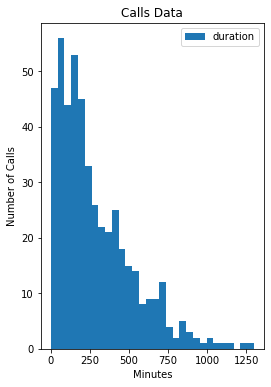

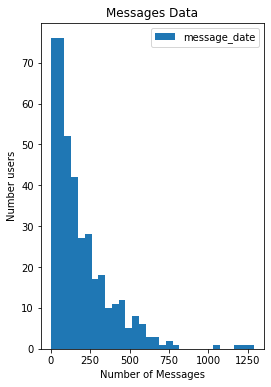

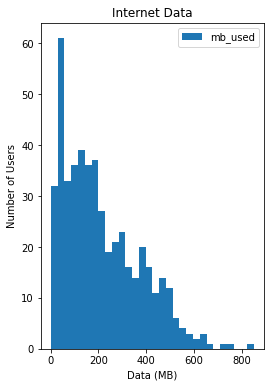

In [17]:
import matplotlib.pyplot as plt

# Plot histograms and describe the distributions
calls_plot = (pd.pivot_table(calls_data, index="user_id", aggfunc="count")).plot(kind='hist', y='duration', bins=30, figsize=(4,6))
calls_plot.set_xlabel("Minutes")
calls_plot.set_ylabel("Number of Calls")
calls_plot.set_title("Calls Data")
plt.show()

messages_plot = (pd.pivot_table(messages_data, index="user_id", aggfunc="count")).plot(kind='hist', y='message_date', bins=30, figsize=(4,6))
messages_plot.set_xlabel("Number of Messages")
messages_plot.set_ylabel("Number users")
messages_plot.set_title("Messages Data")
plt.show()

internet_plot = (pd.pivot_table(internet_data, index="user_id", aggfunc="count")).plot(kind='hist', y='mb_used', bins=30, figsize=(4,6))
internet_plot.set_xlabel("Data (MB)")
internet_plot.set_ylabel("Number of Users")
internet_plot.set_title("Internet Data")
plt.show()

### Notes

The aggregate histograms all seem to tell a similar story: the bulk of average usage is on the low end and a right-skewed distribution.

But what happens if we look at the histograms relative to each user group?

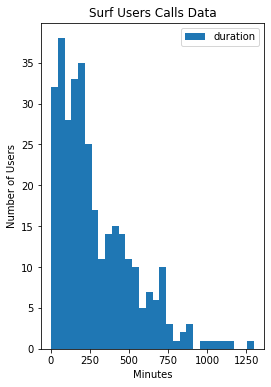

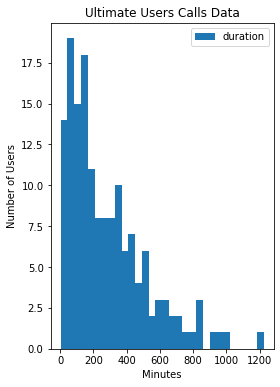

In [18]:
# Plot calls histograms by plan type
calls_surf_data = calls_data.loc[calls_data["user_id"].isin(surf_users)]
calls_surf_data = pd.pivot_table(calls_surf_data, index="user_id", aggfunc="count")

calls_plot = calls_surf_data.plot(kind='hist', y='duration', bins=30, figsize=(4,6))
calls_plot.set_xlabel("Minutes")
calls_plot.set_ylabel("Number of Users")
calls_plot.set_title("Surf Users Calls Data")
plt.show()

calls_ulti_data = calls_data.loc[calls_data["user_id"].isin(ultimate_users)]
calls_ulti_data = pd.pivot_table(calls_ulti_data, index="user_id", aggfunc="count")

calls_plot = calls_ulti_data.plot(kind='hist', y='duration', bins=30, figsize=(4,6))
calls_plot.set_xlabel("Minutes")
calls_plot.set_ylabel("Number of Users")
calls_plot.set_title("Ultimate Users Calls Data")
plt.show()

### Notes

Here we can see that a non-trivial number of Surf users exceed their monthly limit, whereas none of the Ultimate users come even remotely close to 1/2 their monthly limit.

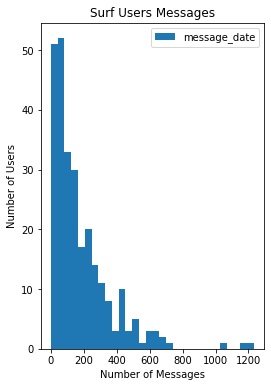

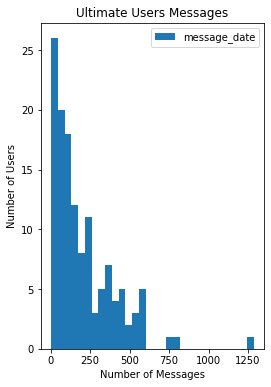

In [19]:
# Plot message histograms by plan type
mess_surf_data = messages_data.loc[messages_data["user_id"].isin(surf_users)]
mess_surf_data = pd.pivot_table(mess_surf_data, index="user_id", aggfunc="count")

mess_plot = mess_surf_data.plot(kind='hist', y='message_date', bins=30, figsize=(4,6))
mess_plot.set_xlabel("Number of Messages")
mess_plot.set_ylabel("Number of Users")
mess_plot.set_title("Surf Users Messages")
plt.show()

mess_ulti_data = messages_data.loc[messages_data["user_id"].isin(ultimate_users)]
mess_ulti_data = pd.pivot_table(mess_ulti_data, index="user_id", aggfunc="count")

mess_plot = mess_ulti_data.plot(kind='hist', y='message_date', bins=30, figsize=(4,6))
mess_plot.set_xlabel("Number of Messages")
mess_plot.set_ylabel("Number of Users")
mess_plot.set_title("Ultimate Users Messages")
plt.show()

### Notes

Here we note that most Surf users far exceed their monthly limit, and only a few Ultimate users do.

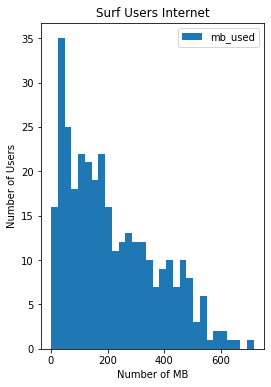

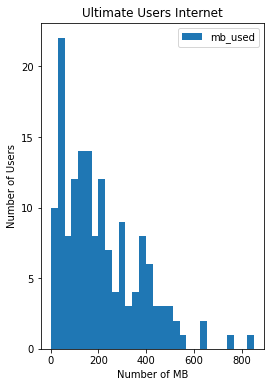

In [20]:
# Plot internet histograms by plan type
internet_surf_data = internet_data.loc[internet_data["user_id"].isin(surf_users)]
internet_surf_data = pd.pivot_table(internet_surf_data, index="user_id", aggfunc="count")

internet_plot = internet_surf_data.plot(kind='hist', y='mb_used', bins=30, figsize=(4,6))
internet_plot.set_xlabel("Number of MB")
internet_plot.set_ylabel("Number of Users")
internet_plot.set_title("Surf Users Internet")
plt.show()

internet_ulti_data = internet_data.loc[internet_data["user_id"].isin(ultimate_users)]
internet_ulti_data = pd.pivot_table(internet_ulti_data, index="user_id", aggfunc="count")

internet_plot = internet_ulti_data.plot(kind='hist', y='mb_used', bins=30, figsize=(4,6))
internet_plot.set_xlabel("Number of MB")
internet_plot.set_ylabel("Number of Users")
internet_plot.set_title("Ultimate Users Internet")
plt.show()

### Notes

Neither group appears to even approach their internet usage limits.

### Conclusion

Given what we've seen so far, if we wanted to fleece the customers, the best approach would be to increase the price of messages sent beyond the limit and to heavily promote the Surf plan.

<a id='section_4'></a>

## Section 4: Statistical Data Analysis
<a href='#section_5'>[Skip to Conclusion]</a>

The null hypothesis in this investigation is that there is no significant difference between the average revenue from the Ultimate and Surf plans.
    
    - Thus, H_0:    mu(Ultimate_Revenue) = mu(Surf_Revenue)

The alternative hypothesis would suggest that one generates more revenue than the other.

    - Thus, H_1:    mu(Ultimate_Revenue) < mu(Surf_Revenue) 
                    OR 
                    mu(Ultimate_Revenue) > mu(Surf_Revenue)

The factors important when testing this hypothesis are the factors that determine how much a given user will pay per month:
    
    - average monthly revenue by plan
    - ratio of user plan to revenue generated
        - i.e., if Ultimate users generate 1.5x revenue of Surf users, but are 2.5x fewer, then it may be a better investment to find 2 new Surf users instead of 1 new Ultimate user
    - user attrition
        - i.e., if there is high turnover with Surf users (e.g., they stay for only 3 months), but great consistency with Ultimate users (they stay for 6 months), then maybe the safer bet is to get 1 new Ultimate user instead of 1 new Surf user
        
For determining whether results are statistically significant, we can use an alpha of 0.05 as the population sample we are using is relatively small (500) and thus we can expect slightly larger variation as a result.

In [21]:
from scipy import stats as st

print("\nTOTAL REVENUE PER MONTH BY PLAN")
display(pd.concat([get_totals(revenue_data_by_month),
                 get_avgs(revenue_data_by_month),
                 get_num_users_by_month(revenue_data_by_month)], axis=1))

ulti_rev = []
surf_rev = []
for user in ultimate_users:
    ulti_rev.append(revenue_data_by_month.loc[user])
for user in surf_users:
    surf_rev.append(revenue_data_by_month.loc[user])

results = st.ttest_ind(ulti_rev, surf_rev)

print("\n\nTest for Statistically Significant Difference")
for month, pval in enumerate(results.pvalue):
    print(f"p-value for {month+1}: ", pval)


TOTAL REVENUE PER MONTH BY PLAN


,ulti_total,surf_total,ulti_avg,surf_avg,ulti_users,surf_users
1,280.0,40.00,70.00,20.00,4,2
2,490.0,310.11,70.00,34.46,7,9
3,896.0,1057.91,74.67,46.00,12,23
4,1533.0,2041.62,73.00,40.83,21,50
5,2051.0,3683.24,70.72,47.83,29,77
6,3367.0,4797.14,71.64,49.46,47,97
7,4242.0,7611.46,71.90,62.90,59,121
8,5173.0,10387.24,72.86,64.12,71,162
9,6195.0,11338.30,72.03,58.44,86,194
10,7665.0,15551.48,72.31,65.62,106,237




Test for Statistically Significant Difference
p-value for 1:  0.007632400680044026
p-value for 2:  0.021955174683449145
p-value for 3:  0.13127133813799097
p-value for 4:  0.08932139169297014
p-value for 5:  0.4930023712891024
p-value for 6:  0.03162866340735365
p-value for 7:  0.32840780122009516
p-value for 8:  0.7459994605992563
p-value for 9:  0.22562906708086328
p-value for 10:  0.7200419089222385
p-value for 11:  0.06469388552127305
p-value for 12:  0.6705074068108325


### Notes

Does the average revenue from users of Ultimate and Surf calling plans differ?

In short, the averages tell us that they do. Looking at the average monthly revenue for Ultimate, we see it hovers around its base price of 70 USD/month/user. Whereas, looking at the average monthly revenue for Surf, we see an upward trend going from 20 USD/month/user all the way up to 70 USD/month/user.

However, starting in March 2018, there are consistently about 2x as many Surf subscribers as Ultimate ones, leading to total monthly average for Surf payers that far exceeds the Ultimate customers.

This seems to strongly indicate that two Surf customers will yield greater revenue than a single Ultimate customer. Furthermore, as the data show, it is already the norm to have about two Surf users to every Ultimate user.

This notwithstanding, if signing up a new customer were equally difficult, independent of plan (which doesn't seem to be the case), then a single Ultimate user will generate more revenue than a single Surf everytime on average.

More importantly, though, are that only the p-values for January, February, and June fall below our alpha of 0.05 for statistical significance; whereas the rest fall firmly above the threshold. Therefore, we cannot reject the null hypothesis that the two means are the same.

In [22]:
# utils
# NY-NJ users
NY_NJ_users = []
other_users = []

for user in users_data.index:
    if "NY-NJ" in users_data.loc[user, "city"]:
        NY_NJ_users.append(users_data.loc[user, "user_id"])
    else:
        other_users.append(users_data.loc[user, "user_id"])

        
# Revenue per user per month
revenue_data_by_month = {}
for user_id in range(1000, 1500):
    revenue_data_by_month[user_id] = [0,0,0,0,0,0,0,0,0,0,0,0]

for user_id in range(1000, 1500):
    plan = users_data.loc[user_id-1000]["plan"]
    for month in range(1,13):
        revenue_data_by_month[user_id][month-1] = get_revenue(calls_data_by_month_duration.loc[user_id, month],
                                                    messages_data_by_month.loc[user_id, month],
                                                    internet_data_by_month.loc[user_id, month], 
                                                    plan)

def get_regional_totals(data):
    NY_NJ_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    other_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    for month in range(1,13):
        for user_id in range(1000, 1500):
            if user_id in NY_NJ_users and data.loc[user_id, month] != 0:
                NY_NJ_per_month[month-1] += data.loc[user_id, month]
            elif user_id in other_users and data.loc[user_id, month] != 0:
                other_per_month[month-1] += data.loc[user_id, month]
    
    # convert to dataframe
    NY_NJ_per_month = pd.DataFrame(NY_NJ_per_month)
    NY_NJ_per_month = NY_NJ_per_month.rename(index=month_mapper)
    NY_NJ_per_month = NY_NJ_per_month.rename(columns={0:"ny_nj_total"})

    other_per_month = pd.DataFrame(other_per_month)
    other_per_month = other_per_month.rename(index=month_mapper)
    other_per_month = other_per_month.rename(columns={0:"other_total"})

    return other_per_month.join(NY_NJ_per_month)


def get_regional_avgs(data):
    NY_NJ_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    other_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    for month in range(1,13):
        ny_nj_users_this_month = 0
        other_users_this_month = 0
        
        for user_id in range(1000, 1500):
            if user_id in NY_NJ_users and data.loc[user_id, month] != 0:
                ny_nj_users_this_month += 1
                NY_NJ_per_month[month-1] += data.loc[user_id, month]
            elif user_id in other_users and data.loc[user_id, month] != 0:
                other_users_this_month += 1
                other_per_month[month-1] += data.loc[user_id, month]
        if ny_nj_users_this_month > 0:
            NY_NJ_per_month[month-1] /= ny_nj_users_this_month
        if other_users_this_month > 0:
            other_per_month[month-1] /= other_users_this_month
    
    # convert to dataframe
    NY_NJ_per_month = pd.DataFrame(NY_NJ_per_month)
    NY_NJ_per_month = NY_NJ_per_month.rename(index=month_mapper)
    NY_NJ_per_month = NY_NJ_per_month.rename(columns={0:"ny_nj_avg"})

    other_per_month = pd.DataFrame(other_per_month)
    other_per_month = other_per_month.rename(index=month_mapper)
    other_per_month = other_per_month.rename(columns={0:"other_avg"})

    return other_per_month.join(NY_NJ_per_month)

In [23]:
revenue_data_by_month = pd.DataFrame.from_dict(revenue_data_by_month, orient="index")
revenue_data_by_month = revenue_data_by_month.rename(columns=month_mapper)
print("AVERAGE REVENUE PER MONTH PER REGION BY USER")
print(get_regional_avgs(revenue_data_by_month))


NY_NJ_rev = []
other_rev = []
for user in NY_NJ_users:
    NY_NJ_rev.append(revenue_data_by_month.loc[user])
for user in other_users:
    other_rev.append(revenue_data_by_month.loc[user])

results = st.ttest_ind(NY_NJ_rev, other_rev)

print("\n\nTest for Statistically Significant Difference")
for month, pval in enumerate(results.pvalue):
    print(f"p-value for {month+1}: ", pval)

AVERAGE REVENUE PER MONTH PER REGION BY USER
    other_avg  ny_nj_avg
1   53.333333   0.000000
2   50.722143  45.000000
3   58.851034  41.205000
4   52.596316  41.187857
5   55.318750  48.121667
6   58.925882  46.078400
7   68.526871  53.939697
8   68.610990  58.217805
9   63.096052  60.253617
10  67.393586  69.289434
11  61.626695  66.571290
12  72.916870  64.735132


Test for Statistically Significant Difference
p-value for 1:  0.32670544936351253
p-value for 2:  0.6336776550663199
p-value for 3:  0.6377260127058236
p-value for 4:  0.9788160016559154
p-value for 5:  0.8266469935391583
p-value for 6:  0.5677751223213028
p-value for 7:  0.7328938019018078
p-value for 8:  0.7942736489200826
p-value for 9:  0.9404457377361116
p-value for 10:  0.9187080912854906
p-value for 11:  0.9234566588488843
p-value for 12:  0.3368297081731899


### Notes

Is the average revenue from users in NY-NJ area different from that of the users from other regions?

As there are no unique NY-NJ users, we will include only those listed as being in both the NY and NJ regions, which is the NY-NJ-PA region. There are other regions that are NY exclusive or inlcude NJ along with PA, DE, and MD; these, however, we will exclude unless otherwise notified.

Until October 2018, those from the NY-NJ region would spend less around 10 USD/month less than the average users of other regions. October and November saw a spike in usage (perhaps they're fond of Halloween and Thanksgiving?), but December saw a return to the previous pattern.

This seems to indicate that NY-NJ customers are more thrifty than their non NY-NJ counterparts on average.

The results from the T-test universally indicate that we should not to reject the null hypothesis.

In [24]:
# ALTERNATIVE NY-NJ users
NY_NJ_users = []
other_users = []

for user in users_data.index:
    if "NY" in users_data.loc[user, "city"] or "NJ" in users_data.loc[user, "city"]:
        NY_NJ_users.append(users_data.loc[user, "user_id"])
    else:
        other_users.append(users_data.loc[user, "user_id"])

        
# Revenue per user per month
revenue_data_by_month = {}
for user_id in range(1000, 1500):
    revenue_data_by_month[user_id] = [0,0,0,0,0,0,0,0,0,0,0,0]

for user_id in range(1000, 1500):
    plan = users_data.loc[user_id-1000]["plan"]
    for month in range(1,13):
        revenue_data_by_month[user_id][month-1] = get_revenue(calls_data_by_month_duration.loc[user_id, month],
                                                    messages_data_by_month.loc[user_id, month],
                                                    internet_data_by_month.loc[user_id, month], 
                                                    plan)

def get_regional_avgs(data):
    NY_NJ_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    other_per_month = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    for month in range(1,13):
        ny_nj_users_this_month = 0
        other_users_this_month = 0
        
        for user_id in range(1000, 1500):
            if user_id in NY_NJ_users and data.loc[user_id, month] != 0:
                ny_nj_users_this_month += 1
                NY_NJ_per_month[month-1] += data.loc[user_id, month]
            elif user_id in other_users and data.loc[user_id, month] != 0:
                other_users_this_month += 1
                other_per_month[month-1] += data.loc[user_id, month]
        if ny_nj_users_this_month > 0:
            NY_NJ_per_month[month-1] /= ny_nj_users_this_month
        if other_users_this_month > 0:
            other_per_month[month-1] /= other_users_this_month
    
    # convert to dataframe
    NY_NJ_per_month = pd.DataFrame(NY_NJ_per_month)
    NY_NJ_per_month = NY_NJ_per_month.rename(index=month_mapper)
    NY_NJ_per_month = NY_NJ_per_month.rename(columns={0:"ny_nj_total"})

    other_per_month = pd.DataFrame(other_per_month)
    other_per_month = other_per_month.rename(index=month_mapper)
    other_per_month = other_per_month.rename(columns={0:"other_total"})

    return other_per_month.join(NY_NJ_per_month)
        
revenue_data_by_month = pd.DataFrame.from_dict(revenue_data_by_month, orient="index")
revenue_data_by_month = revenue_data_by_month.rename(columns=month_mapper)
print("AVERAGE REVENUE PER MONTH PER REGION BY USER")
display(get_regional_avgs(revenue_data_by_month))

AVERAGE REVENUE PER MONTH PER REGION BY USER


,other_total,ny_nj_total
1,60.000000,20.000000
2,51.675833,45.000000
3,59.795385,44.358889
4,52.573889,43.272353
5,55.730000,47.485238
6,59.264737,46.932000
7,68.536714,56.458000
8,68.608066,60.426538
9,62.867143,61.763968
10,66.444170,72.362639


In [25]:
NY_NJ_rev = []
other_rev = []
for user in NY_NJ_users:
    NY_NJ_rev.append(revenue_data_by_month.loc[user])
for user in other_users:
    other_rev.append(revenue_data_by_month.loc[user])

results = st.ttest_ind(NY_NJ_rev, other_rev)

print("\n\nTest for Statistically Significant Difference")
for month, pval in enumerate(results.pvalue):
    print(f"p-value for {month+1}: ", pval)



Test for Statistically Significant Difference
p-value for 1:  0.4253167498989646
p-value for 2:  0.8630914902395985
p-value for 3:  0.9829451062004662
p-value for 4:  0.9969632669672412
p-value for 5:  0.47608255098956564
p-value for 6:  0.3578896502813429
p-value for 7:  0.6261845556820114
p-value for 8:  0.8843041015267051
p-value for 9:  0.47683499070420843
p-value for 10:  0.34952470965902505
p-value for 11:  0.6097294090018488
p-value for 12:  0.23029461278760435


### Notes

Just for fun, we can look at the figures for which include all areas that list either NY or NJ as in their domain.

Here we see told an nearly identical tale where a spike in October and November gives way to the trend that preceded it when December rolls around.

In either case, it seems NY-NJ is poison in the revenue stream.

Likewise, the p-values all suggest that we should not reject the null hypothesis.

<a id='section_5'></a>

# Section 5: Conclusion
<a href='#toc'>[Return to Table of Contents]</a>

Overall, it appears that with the exception of a few months, the two sample means for Surf and Ultimate are, as H_0 suggests, not different to a statistically significant degree (with a few anomalous months where, despite having twice as many users, Surf generated less income on average).

As to which plan is most profitable, the Ultimate users appear to generate more income per individual, but there is strength in numbers and clearly it is easier to sign up Surf users--the fact that there are already twice as many Surf users as Ultimate (with no special marketing) suggests this. I interpret this to mean that for every Ultimate user, we can just as easily get two Surf users, this means that we can double the average revenue from Surf users to make a fair comparison.

When viewed through this lens, Surf users become more profitable (by roughly a 12/7 ratio in December).

Thus, aggressive Surf recruitment seems like the best course of action.

Likewise, the NY-NJ, when compared to other regions, did not vary to a statistically significant degree.